In [9]:
## imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
root = os.path.expanduser('~')

# company_index='5'
# company_name='Amazon'
# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/'\
#             +f'{company_index}_{company_name}'
# img_path = root + '/Desktop/Paper/img'
# img_flag = False

# if not os.path.exists(img_path):
#     os.makedirs(img_path)

In [10]:
pc_flag = 'pro'

sentences = pd.\
read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_sampled_6.csv')

# sentences = pd.\
# read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_all.csv')


sentences.shape

(33624, 15)

In [11]:
df = sentences.copy()

data_px = df['Px_Texts'].str.split().values
data_px


array([list(['benefit', 'break', 'discount', 'reason', 'schedul', 'time', 'benefit_discount', 'discount_break']),
       list(['amaz', 'break', 'cowork', 'fast', 'fun', 'hour', 'pace', 'fast_pace', 'hour_break']),
       list(['break', 'enforc', 'hour', 'lunch', 'hour_lunch', 'lunch_break', 'hour_lunch_break']),
       ...,
       list(['benefit', 'flex', 'time', 'flex_time', 'time_benefit']),
       list(['balanc', 'benefit', 'divers', 'telecommut', 'worklif', 'benefit_divers', 'worklif_balanc']),
       list(['cowork', 'free', 'ice', 'italian', 'manag', 'thursday', 'cowork_manag', 'manag_free'])],
      dtype=object)

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_px) ##dictionary
print(len(id2word))
print(id2word)

# Create Corpus
texts = data_px 

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]  ##corpus

# View
print(corpus[:5])

14878
Dictionary(14878 unique tokens: ['benefit', 'benefit_discount', 'break', 'discount', 'discount_break']...)
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(2, 1), (13, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(6, 1), (13, 1), (17, 1), (19, 1), (21, 1)], [(19, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]]


In [13]:
# %%time
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
num_topics = 10
mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet' # update this path
%time ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)
# %time ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=42)

CPU times: user 810 ms, sys: 19.6 ms, total: 830 ms
Wall time: 29.4 s


In [14]:
# Compute Coherence Score
%time coherence_model_lda = CoherenceModel(model=ldamallet, texts=data_px, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

CPU times: user 2.62 ms, sys: 1.86 ms, total: 4.47 ms
Wall time: 3.21 ms

Coherence Score:  0.2981242126186606


In [15]:
##mallet model to lda model conversion
optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [16]:
# %%time
# Visualize the topics
pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, mds='tsne')
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis
# pyLDAvis.show(vis)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.205937 -0.237834       1        1  10.079937
1      0.173511 -0.043203       2        1  10.051731
3      0.281862 -0.093988       3        1  10.024426
0     -0.225885 -0.235611       4        1  10.018610
2     -0.135156  0.024784       5        1  10.005467
8      0.076503  0.074922       6        1   9.976376
4      0.274850 -0.084936       7        1   9.973781
6     -0.086469  0.210281       8        1   9.964022
7     -0.081910  0.146833       9        1   9.956827
9     -0.071369  0.238754      10        1   9.948822, topic_info=     Category         Freq             Term        Total  loglift  logprob
30    Default  5171.000000              pay  5171.000000  30.0000  30.0000
36    Default  4760.000000             free  4760.000000  29.0000  29.0000
0     Default  8610.000000          benefit  8610.000000  28.0000  28.0000
143   Default  2979.000000            peopl  2979.000000  27.0000  27.0000
19    Default  3899.000000            lunch  3899.000000  26.0000  26.0000
13    Default  2784.000000             hour  2784.000000  25.0000  25.0000
7     Default  2435.000000             time  2435.000000  24.0000  24.0000
86    Default  2184.000000            manag  2184.000000  23.0000  23.0000
84    Default  2076.000000          environ  2076.000000  22.0000  22.0000
156   Default  2075.000000          flexibl  2075.000000  21.0000  21.0000
171   Default  1903.000000          employe  1903.000000  20.0000  20.0000
2     Default  1796.000000            break  1796.000000  19.0000  19.0000
3     Default  1766.000000         discount  1766.000000  18.0000  18.0000
61    Default  1742.000000       free_lunch  1742.000000  17.0000  17.0000
336   Default  1697.000000         opportun  1697.000000  16.0000  16.0000
9     Default  1489.000000           cowork  1489.000000  15.0000  15.0000
49    Default  1491.000000             paid  1491.000000  14.0000  14.0000
6     Default  1387.000000          schedul  1387.000000  13.0000  13.0000
165   Default  1331.000000              lot  1331.000000  12.0000  12.0000
235   Default  1323.000000            learn  1323.000000  11.0000  11.0000
321   Default  1303.000000            excel  1303.000000  10.0000  10.0000
93    Default  1270.000000              day  1270.000000   9.0000   9.0000
254   Default  1227.000000             team  1227.000000   8.0000   8.0000
189   Default  1145.000000      pay_benefit  1145.000000   7.0000   7.0000
51    Default  1131.000000            vacat  1131.000000   6.0000   6.0000
506   Default  1126.000000           balanc  1126.000000   5.0000   5.0000
169   Default  1127.000000             nice  1127.000000   4.0000   4.0000
35    Default  1081.000000             food  1081.000000   3.0000   3.0000
311   Default  1074.000000            train  1074.000000   2.0000   2.0000
159   Default  1049.000000         friendli  1049.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
418   Topic10   202.073922             hard   202.073922   2.3077  -4.6576
489   Topic10   194.965794             move   194.965794   2.3077  -4.6934
58    Topic10   180.749538    custom_servic   180.749538   2.3077  -4.7692
284   Topic10   315.803968           reward   317.868277   2.3012  -4.2112
1577  Topic10   153.332473  compens_benefit   153.332473   2.3077  -4.9337
529   Topic10   149.270686             goal   149.270686   2.3077  -4.9605
236   Topic10   144.193452        learn_lot   144.193452   2.3077  -4.9951
617   Topic10   130.992643              big   130.992643   2.3077  -5.0911
123   Topic10   212.228390             love   213.274329   2.3028  -4.6086
1413  Topic10   122.869068         industri   122.869068   2.3077  -5.1552
547   Topic10   115.760940          varieti   115.760940   2.3077  -5.2147
1586  Topic10   114.745493  benefit_compens   114.745493   2.3077  -5.2236
1924  Top

In [17]:
#parameter tuning (finding the best model)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, 
                                                  random_seed=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
#  Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_px, start=8, limit=30, step=2)

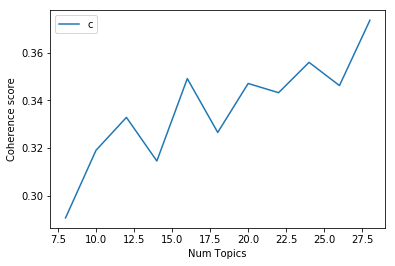

In [19]:
# Show graph
limit=30; start=8; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 8  has Coherence Value of 0.2906
Num Topics = 10  has Coherence Value of 0.319
Num Topics = 12  has Coherence Value of 0.3329
Num Topics = 14  has Coherence Value of 0.3145
Num Topics = 16  has Coherence Value of 0.3492
Num Topics = 18  has Coherence Value of 0.3265
Num Topics = 20  has Coherence Value of 0.3471
Num Topics = 22  has Coherence Value of 0.3432
Num Topics = 24  has Coherence Value of 0.356
Num Topics = 26  has Coherence Value of 0.3462
Num Topics = 28  has Coherence Value of 0.3737


In [ ]:
def lda_viz(num_topics): 

    # %%time
    # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    num_topics = num_topics
    mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet' # update this path
    ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)
    # %time ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=42)


    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamallet, texts=data_px, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)


    ##mallet model to lda model conversion
    optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

    # %%time
    # Visualize the topics
    pyLDAvis.enable_notebook()
    # vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, mds='tsne')
    vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
    vis
    # pyLDAvis.show(vis)

In [ ]:
lda_viz(16)